In [16]:
import pandas as pd 
from sklearn import preprocessing
import os 
from sklearn.linear_model import LinearRegression
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


data_path  = 'Car details v3.csv'
car_data = pd.read_csv(data_path)
car_data = car_data.drop(['name', 'torque'], axis=1)

for i in range(len(car_data)):
    try:
        car_data.at[i, 'max_power'] = float(str(car_data.at[i, 'max_power']).split()[0])
        car_data.at[i, 'mileage'] = float(str(car_data.at[i, 'mileage']).split()[0])
        car_data.at[i, 'engine'] = float(str(car_data.at[i, 'engine']).split()[0])

    except:
        car_data.at[i, 'max_power'] = 0
        car_data.at[i, 'mileage'] = 0
        car_data.at[i, 'engine'] = 0

        
car_data.fillna(method ='ffill', inplace = True)
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# car_data = pd.get_dummies(car_data, columns=categorical_columns, dtype=int)
# car_data = car_data.drop(categorical_columns, axis=1)

label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    car_data[col] = label_encoder.fit_transform(car_data[col])

car_data.head()
# sns.pairplot(car_data)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [17]:
# numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = ['year','fuel', 'km_driven', 'selling_price','owner','seats', 'seller_type','transmission', 'mileage', 'engine',	'max_power']
# numerical_cols = list(sorted(set(car_data.columns)-{'selling_price'}))
scaler = StandardScaler()
car_data[numerical_cols] = scaler.fit_transform(car_data[numerical_cols])
Y = car_data.loc[:, 'selling_price']
X = car_data.loc[:, list(sorted(set(car_data.columns)-{'selling_price'}))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test.head()

,engine,fuel,km_driven,max_power,mileage,owner,seats,seller_type,transmission,year
8022,2.110801,-0.889115,0.003192,-0.817296,-0.849638,-0.666639,1.645877,0.277607,0.385158,0.048464
7499,1.010878,-0.889115,0.180036,1.308260,-0.018109,0.970600,-0.435120,0.277607,0.385158,-0.198816
4513,-0.416050,-0.889115,1.948474,-0.487276,-0.025511,-0.666639,-0.435120,0.277607,0.385158,-0.940656
3276,-0.416050,-0.889115,-0.173652,-0.078945,1.679494,2.607839,-0.435120,0.277607,0.385158,0.295744
2915,-0.416050,-0.889115,-0.315127,-0.078945,1.047828,-0.666639,-0.435120,0.277607,0.385158,0.543024


R2 Score (MODEL): 0.6679853670748952
R2 Score (METRICS OR TEST DATA): 0.6955044481054861
Intercept: 0.0026183607267357594
MAE: 0.3345938542912821
MSE: 0.29676283614195
RMSE: 0.5447594296035178


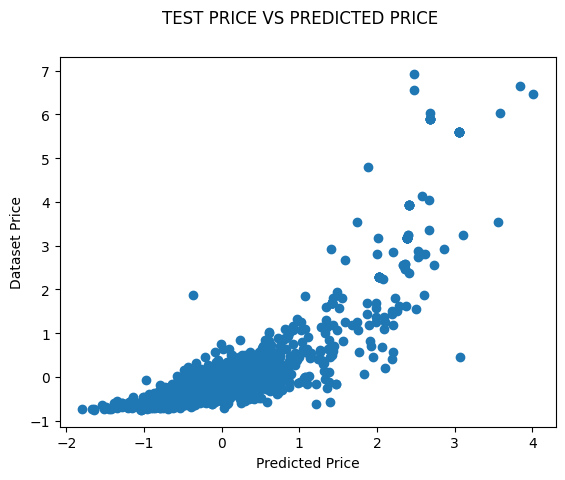

In [18]:

lr = LinearRegression()
lr.fit(X_train, Y_train)
price_predictions = lr.predict(X_test)

print(f"R2 Score (MODEL): {lr.score(X_train, Y_train)}")
print(f"R2 Score (METRICS OR TEST DATA): {metrics.r2_score(Y_test, price_predictions)}")
print(f"Intercept: {lr.intercept_}")


print('MAE:', metrics.mean_absolute_error(Y_test, price_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, price_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, price_predictions)))

fig = plt.figure()
# Plot-label
fig.suptitle('TEST PRICE VS PREDICTED PRICE')

#X-label
plt.xlabel('Predicted Price')

# Y-label
plt.ylabel('Dataset Price')
plt.scatter(price_predictions, Y_test)

Cost is: 0.5000997616103375
Cost is: 0.17194647054305828
Cost is: 0.16879179413741424
Cost is: 0.16788151469770368
Cost is: 0.16748576322534678
Cost is: 0.16728815016192106
Cost is: 0.16718241311924664
Cost is: 0.1671235884788121
Cost is: 0.16709008397478978
Cost is: 0.16707071244536048
R2 Score (METRICS OR TEST DATA): 0.5751314825457008
R2 Score (MODEL): 0.6679853670748952
R2 Score (METRICS OR TEST DATA): 0.6960481537149512
MAE: 0.3340792487092799
MSE: 0.2962329380278815
RMSE: 0.5442728525545634


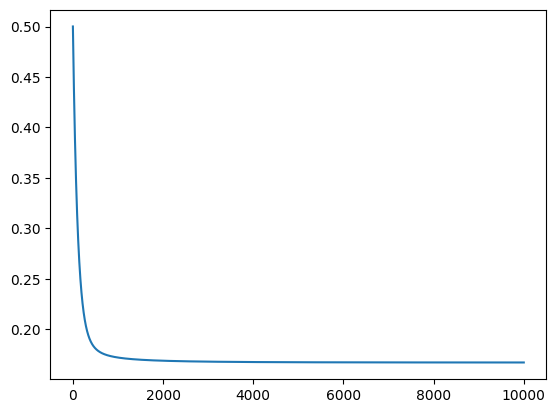

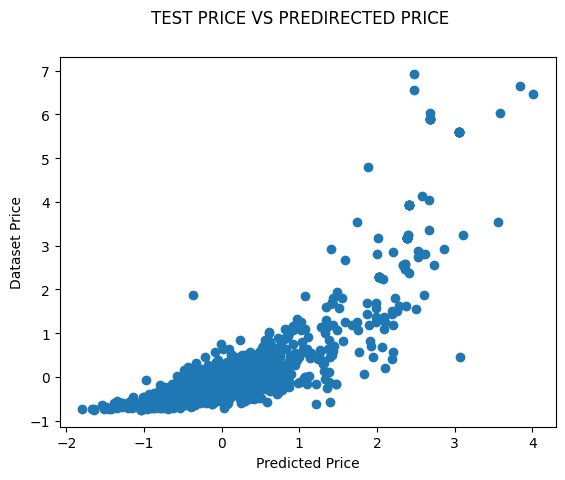

In [25]:

import matplotlib.pyplot as plt
import io
import urllib, base64
from PIL import Image
from numpy import asarray
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep
 



import numpy as np
import matplotlib.pyplot as plt
from time import sleep


def predict(X, w, b):
    return X.dot(w) + b

   
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
  
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list



def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

w, b, c = GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.002 ,epochs=10000)


plt.plot(c)



y_pred = predict(X_test, w, b)
print(f"R2 Score (METRICS OR TEST DATA): {r2score(Y_test, y_pred)}")
fig = plt.figure()
# Plot-label
fig.suptitle('TEST PRICE VS PREDIRECTED PRICE')

#X-label
plt.xlabel('Predicted Price')

# Y-label
plt.ylabel('Dataset Price')
plt.scatter(price_predictions, Y_test)

print(f"R2 Score (MODEL): {lr.score(X_train, Y_train)}")
print(f"R2 Score (METRICS OR TEST DATA): {metrics.r2_score(Y_test, y_pred)}")

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


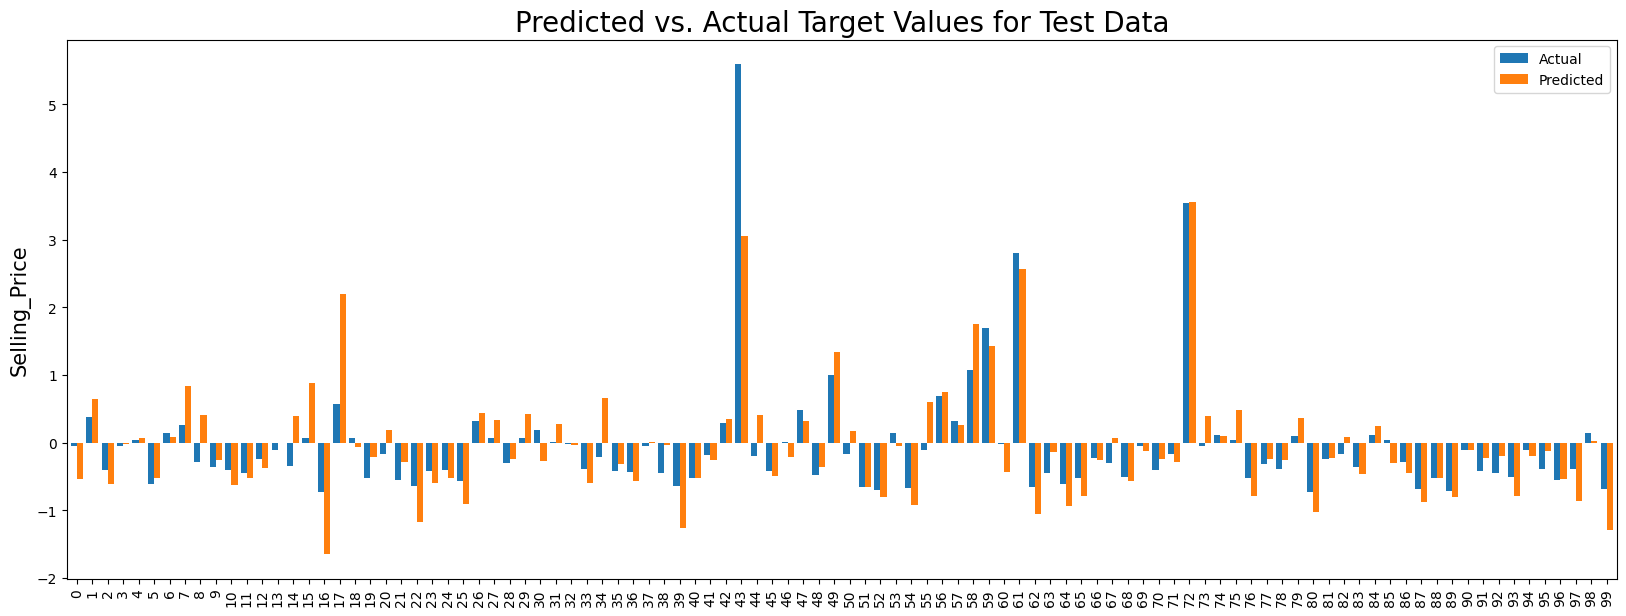

In [26]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

df_comp = pd.DataFrame({'Actual':Y_test, 'Predicted':price_predictions})
compare_plot(df_comp.iloc[:100,:])



In [33]:
def linear_assumption(X_test, Y_test, y_pred):
    sns.regplot(x=y_pred, y=Y_test, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.xlabel('Predicted Data')
    plt.ylabel('Test Data', fontsize=15)

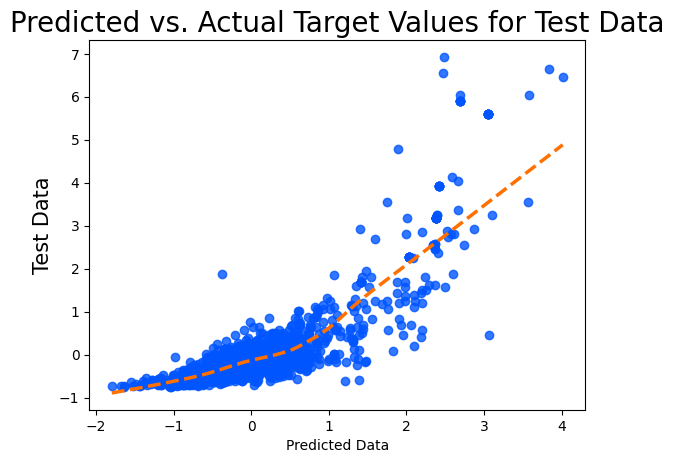

In [35]:


linear_assumption(X_test, Y_test, price_predictions)

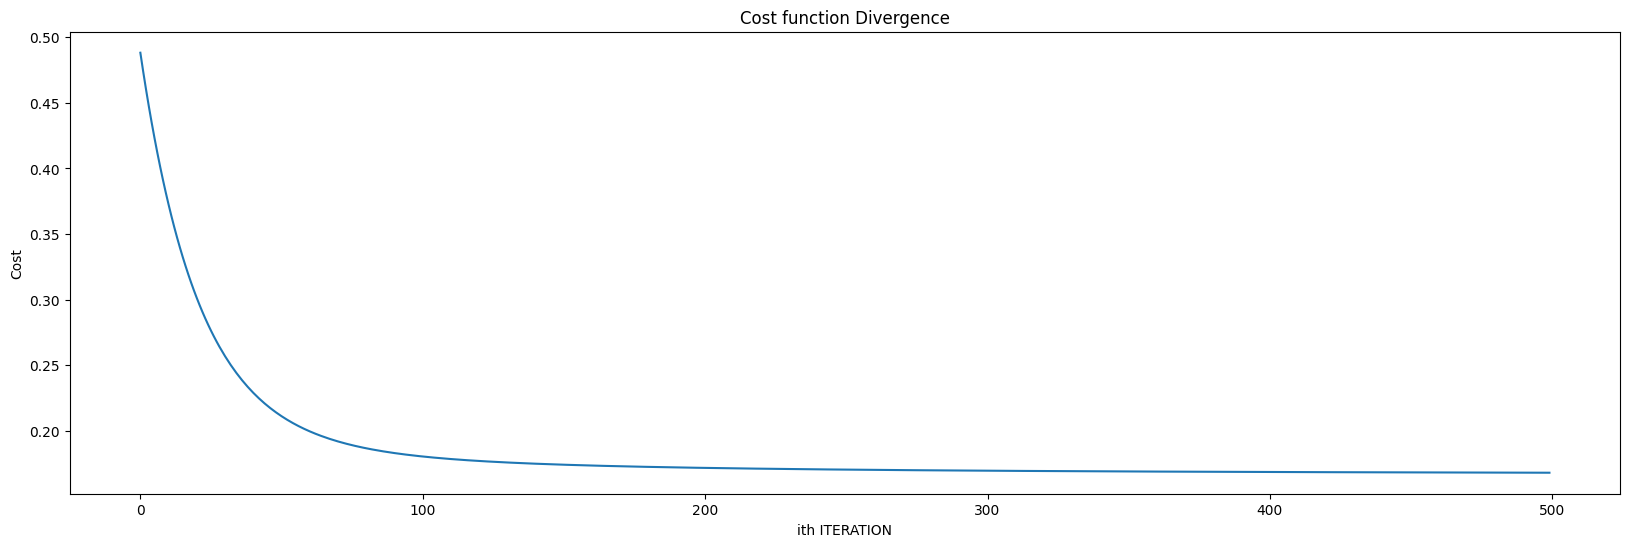

In [24]:
#COST FUNCTION CONVERGENCE animation
import matplotlib.pyplot as plt
import io
import urllib, base64
from PIL import Image
from numpy import asarray
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep
 


def predict(X, w, b):
    return X.dot(w) + b

   
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost


def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
  
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        fig, ax = plt.subplots(figsize=(20, 6))
        ax.plot(cost_list)
        ax.set(title = "Cost function Divergence",
        xlabel = "ith ITERATION",
        ylabel = "Cost")
        plt.show()
        # sleep(0.1)
        clear_output(wait=True)
        
    return w, b, cost_list



def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

w, b, c = GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.01 ,epochs=500)


fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(c)
ax.set(title = "Cost function Divergence", xlabel = "ith ITERATION", ylabel = "Cost")
plt.show()



y_pred = predict(X_test, w, b)




KeyboardInterrupt: 